# Import libraries

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [2]:
# Sampling frequency 4Hz ~= 0.25s
fl_eda_３ = pd.read_csv('../data/day_1/EDA.csv' , header= None)
fl_eda_3.columns  = ['eda']
fl_eda_freq_2 = fl_eda_2.iloc[1].values
print(len(fl_eda_2))
print('freq: ', fl_eda_freq_2)
fl_eda_2.head(10)

7640
freq:  [4.]


,eda
0,1.530146e+09
1,4.000000e+00
2,0.000000e+00
3,8.339960e-01
4,1.181441e+00
5,1.619646e+00
6,2.097595e+00
7,2.202845e+00
8,2.200282e+00
9,2.196439e+00


In [3]:
print(len(fl_eda_2))
fl_eda_2.head(5)

7640


,eda
0,1.530146e+09
1,4.000000e+00
2,0.000000e+00
3,8.339960e-01
4,1.181441e+00


## Convert time

In [4]:
fl_init_time_2 = datetime.datetime.fromtimestamp(fl_eda_2.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_2

'2018-06-27 17:30:03'

In [5]:
fl_eda_2 = fl_eda_2.iloc[3:]

In [6]:
fl_time_eda_2 = pd.date_range(start=fl_init_time_2, periods=len(fl_eda_2), 
                              freq=str(1/int(fl_eda_freq_2))+'S')
fl_time_eda_2

DatetimeIndex([       '2018-06-27 17:30:03', '2018-06-27 17:30:03.250000',
               '2018-06-27 17:30:03.500000', '2018-06-27 17:30:03.750000',
                      '2018-06-27 17:30:04', '2018-06-27 17:30:04.250000',
               '2018-06-27 17:30:04.500000', '2018-06-27 17:30:04.750000',
                      '2018-06-27 17:30:05', '2018-06-27 17:30:05.250000',
               ...
               '2018-06-27 18:01:49.750000',        '2018-06-27 18:01:50',
               '2018-06-27 18:01:50.250000', '2018-06-27 18:01:50.500000',
               '2018-06-27 18:01:50.750000',        '2018-06-27 18:01:51',
               '2018-06-27 18:01:51.250000', '2018-06-27 18:01:51.500000',
               '2018-06-27 18:01:51.750000',        '2018-06-27 18:01:52'],
              dtype='datetime64[ns]', length=7637, freq='250L')

In [7]:
fl_eda_2 = fl_eda_2.set_index(fl_time_eda_2, drop =True)
fl_eda_2 = fl_eda_2[:]
fl_eda_2 = fl_eda_2.dropna()
print(len(fl_eda_2))
fl_eda_2.head()

7637


,eda
2018-06-27 17:30:03.000,0.833996
2018-06-27 17:30:03.250,1.181441
2018-06-27 17:30:03.500,1.619646
2018-06-27 17:30:03.750,2.097595
2018-06-27 17:30:04.000,2.202845


# Remove outliers

In [8]:
fl_exp2 = fl_eda_2.copy()#example dataset of normally distributed data. 


fl_exp2= fl_exp2[np.abs(fl_exp2.eda-fl_exp2.eda.mean())<=(3*fl_exp2.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp2= fl_exp2[~(np.abs(fl_exp2.eda-fl_exp2.eda.mean())>(3*fl_exp2.eda.std()))] #or if you prefer the other way around
fl_exp2 = fl_exp2.dropna()
print(len(fl_exp2))
fl_exp2.head()

7637


,eda
2018-06-27 17:30:03.000,0.833996
2018-06-27 17:30:03.250,1.181441
2018-06-27 17:30:03.500,1.619646
2018-06-27 17:30:03.750,2.097595
2018-06-27 17:30:04.000,2.202845


## Time marks

In [10]:
tags_2 = pd.read_csv('../data/marks/6.27.csv' , header= None)
tags_2 = tags_2.drop(tags_2.columns[2],axis=1)
tags_2.columns  =  ['tagged_time','presence']
tags_2.head()

,tagged_time,presence
0,2018-06-27 18:00:24.518,1
1,2018-06-27 17:57:24.024,1
2,2018-06-27 17:55:35.289,1
3,2018-06-27 17:52:34.799,1
4,2018-06-27 17:41:07.577,1


In [11]:
tags_2.tagged_time[0]

'2018-06-27 18:00:24.518'

# Visualization

In [2]:
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='lightcoral')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axvline(x = tags_2.tagged_time[0],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')

eda_mean = np.mean(fl_exp2.eda)
plt.axhline(y = eda_mean, color = 'limegreen', linestyle = '--')
plt.show()


NameError: name 'plt' is not defined

## Logarithm 

In [18]:
fl_exp2['eda'] = np.log(fl_exp2['eda'])
fl_exp2.head(5)

,eda
2018-06-27 17:30:03.000,-0.181527
2018-06-27 17:30:03.250,0.166735
2018-06-27 17:30:03.500,0.482208
2018-06-27 17:30:03.750,0.740791
2018-06-27 17:30:04.000,0.789750


0.1664740844384839


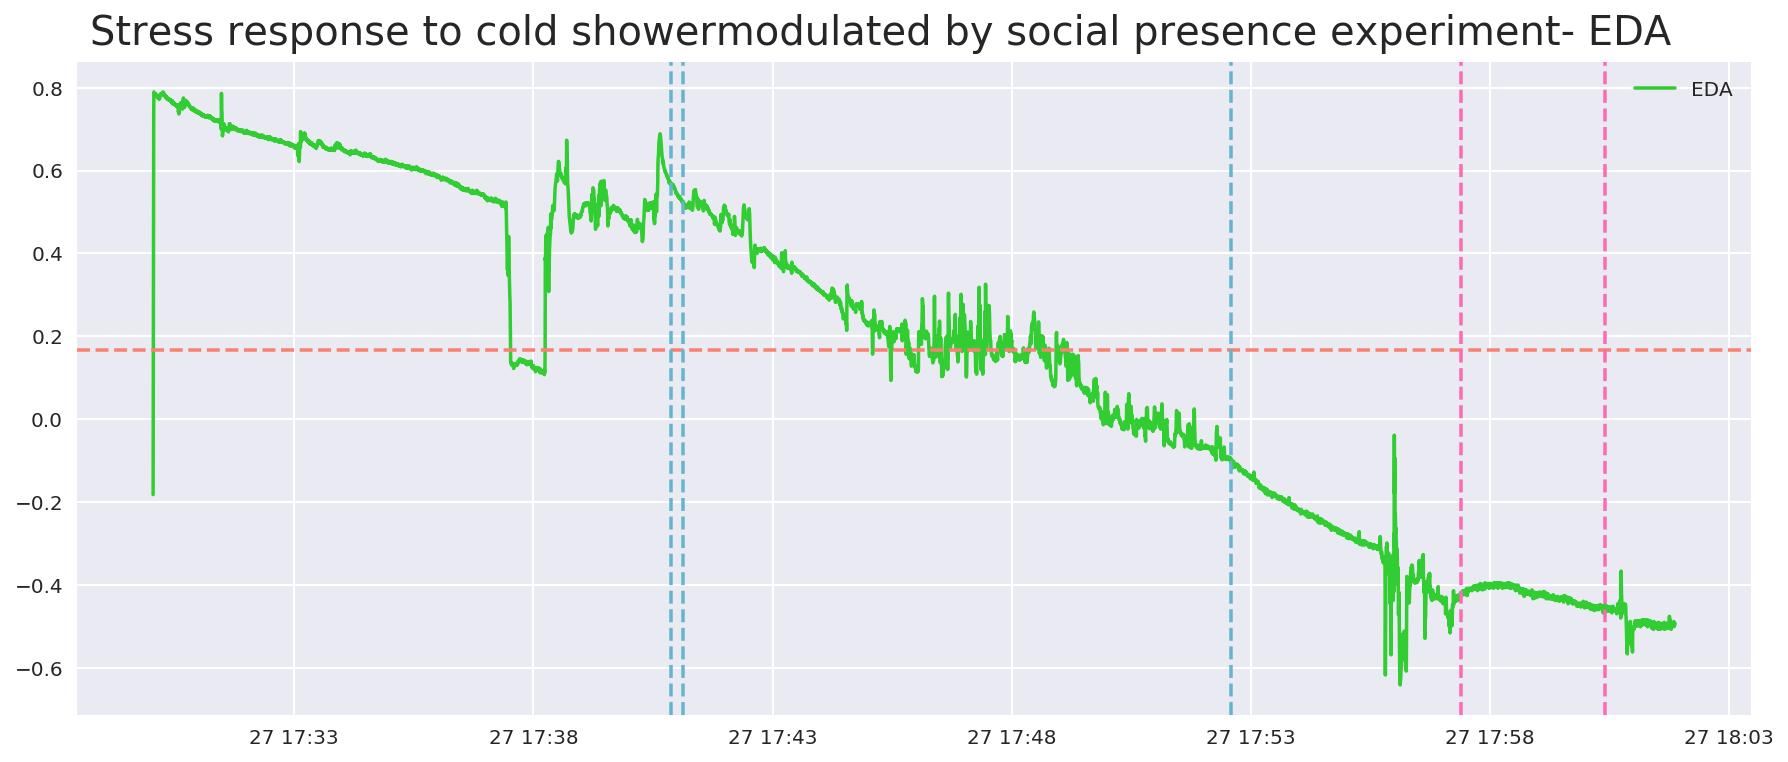

In [21]:
log_eda_mean = np.mean(fl_exp2.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_2.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
plt.show()